In [8]:

# Annotations :
from typing import List, Dict, Callable, NoReturn, Any, Optional

# Data and numerical :
import numpy as np
import pandas as pd

# Plotting :
import matplotlib.pyplot as plt
import seaborn as sns

# Local : 
from preproc import time_indexed_df, import_csv
from Utils import comparative_hba1c_plot, proportions_visualiser, dist_plot

# Debugging only, remove after building : 
%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 8)

In [9]:
cgm_data = import_csv("preprocessed/CareLink-19-apr-2020-3-months.csv")

In [2]:
data = pd.read_csv("mySugr_data/Export.csv")
data.columns

Index(['Date', 'Time', 'Tags', 'Blood Sugar Measurement (mg/dL)',
       'Insulin Injection Units (Pen)', 'Basal Injection Units',
       'Insulin Injection Units (pump)', 'Insulin (Meal)',
       'Insulin (Correction)', 'Temporary Basal Percentage',
       'Temporary Basal Duration (Minutes)',
       'Meal Carbohydrates (Grams, Factor 1)', 'Meal Descriptions',
       'Activity Duration (Minutes)',
       'Activity Intensity (1: Cosy, 2: Ordinary, 3: Demanding)',
       'Activity Description', 'Steps', 'Note', 'Location', 'Blood pressure',
       'Body weight (kg)', 'HbA1c (Percent)', 'Ketones', 'Food type',
       'Medication'],
      dtype='object')

In [3]:
# Date-time indexing :
x = data.copy() 
x["DateTime"] =  x["Date"] + " " + x["Time"]
x.drop(["Date", "Time"], axis=1, inplace=True)
y = time_indexed_df(x, 'DateTime')
y.index = y.index.map(lambda t: t.replace(second=0))

In [4]:
real = y["2020"]
real.columns

Index(['Tags', 'Blood Sugar Measurement (mg/dL)',
       'Insulin Injection Units (Pen)', 'Basal Injection Units',
       'Insulin Injection Units (pump)', 'Insulin (Meal)',
       'Insulin (Correction)', 'Temporary Basal Percentage',
       'Temporary Basal Duration (Minutes)',
       'Meal Carbohydrates (Grams, Factor 1)', 'Meal Descriptions',
       'Activity Duration (Minutes)',
       'Activity Intensity (1: Cosy, 2: Ordinary, 3: Demanding)',
       'Activity Description', 'Steps', 'Note', 'Location', 'Blood pressure',
       'Body weight (kg)', 'HbA1c (Percent)', 'Ketones', 'Food type',
       'Medication'],
      dtype='object')

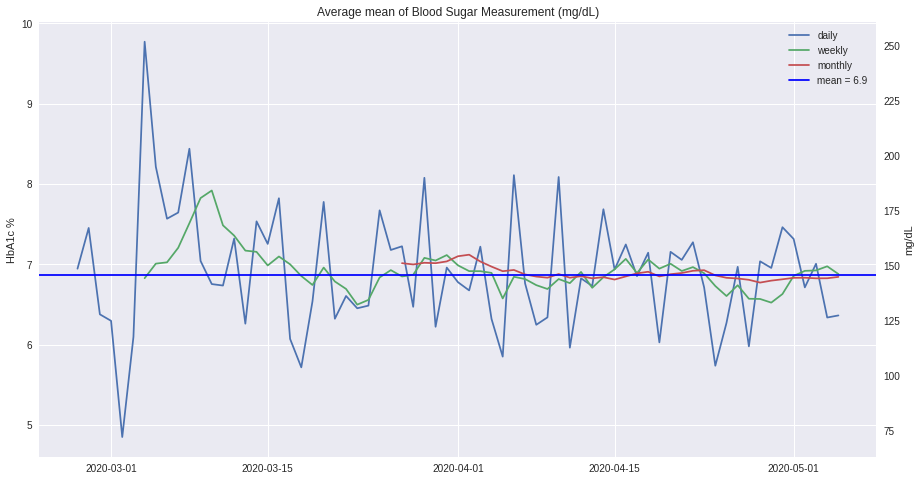

In [5]:
comparative_hba1c_plot(real, colum_name=real.columns[1])

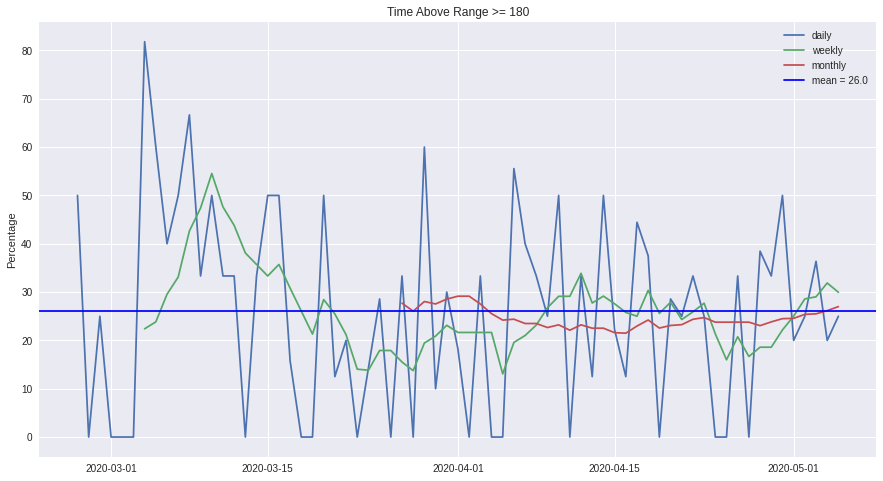

In [6]:
proportions_visualiser(real, colum_name=real.columns[1], kind='tar')

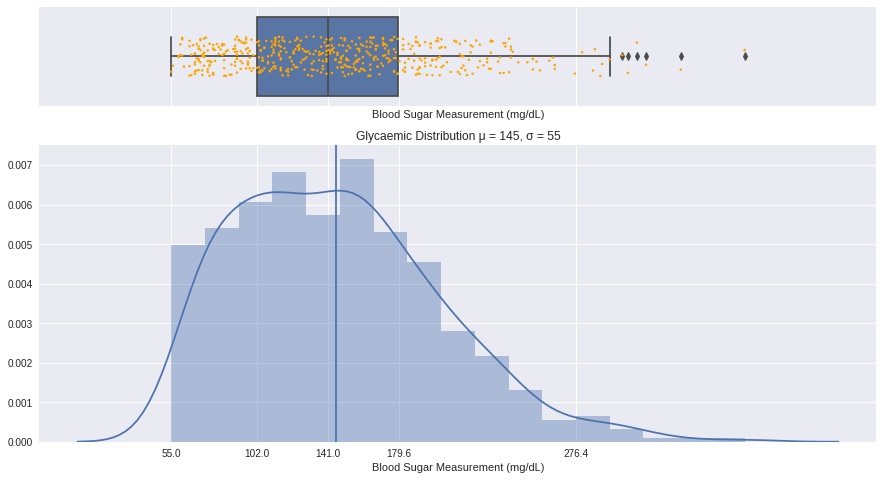

In [7]:
dist_plot(real["Blood Sugar Measurement (mg/dL)"])

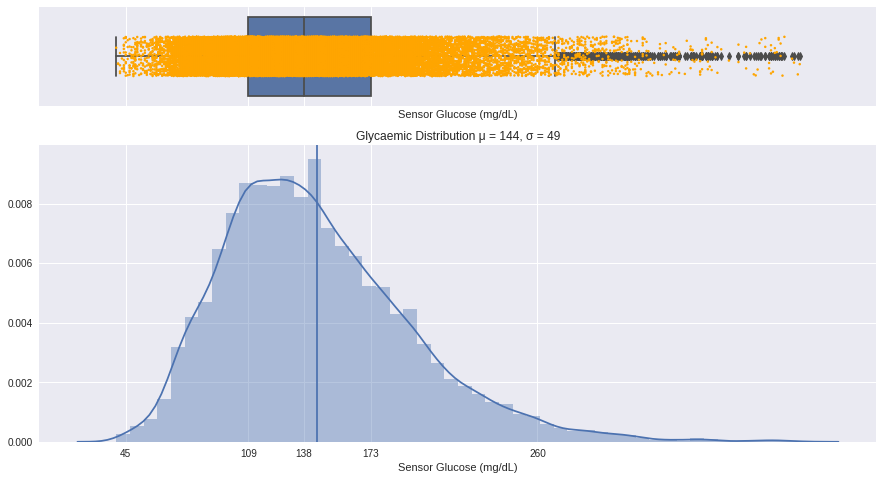

In [10]:
dist_plot(cgm_data["Sensor Glucose (mg/dL)"])